# Aplikasi Mobil Bekas
Tutorial:
1. https://www.youtube.com/watch?v=txlVLgHSUJE&t=1658s
2. https://www.youtube.com/watch?v=fKnqSyYEYRE&t=48s

Data set: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

## Import library

In [2]:
# memanggil library yangg diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [12]:
# membaca file excel ke dataframe df
df=pd.read_csv('toyota.csv')

## Data Understanding

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [5]:
# terdapat 9 kolom dan 6738 row data
df.shape

(6738, 9)

In [6]:
# Mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [7]:
# melihat apakah ada yang missing value
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<Axes: >

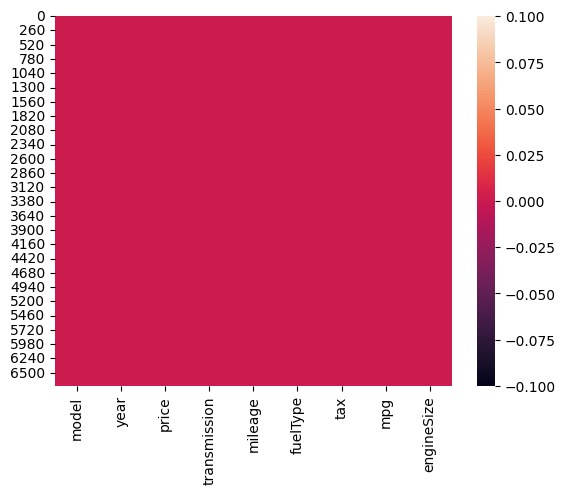

In [8]:
# melihat apakah ada yang missing value menggunakan heatmap
sns.heatmap(df.isnull())

In [9]:
# melihat nilai rata-rata angka float dari setiap data set
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


## Visualisasi Data

<Axes: >

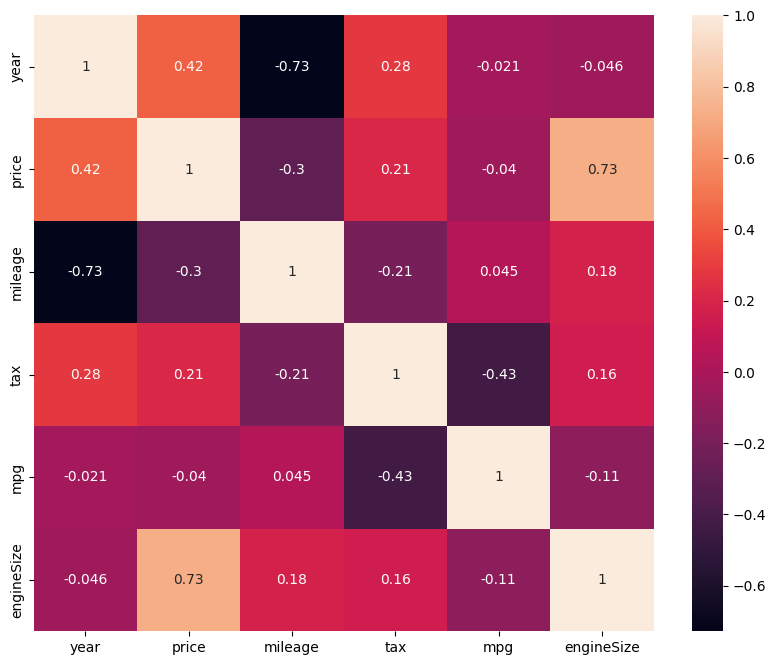

In [10]:
# menamppilkan atribut data numerik
df=df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

### Plot jumlah mobil berdasarkan merk

In [13]:
# jumlah mobil berdasarkan model
models = df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

/var/folders/1_/sz5215394376d82cr86lcyl40000gn/T/ipykernel_3266/1349559987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models['model'], y=models['numberOfCars'], palette='Blues_d').set_title('Jumlah mobil dan model')


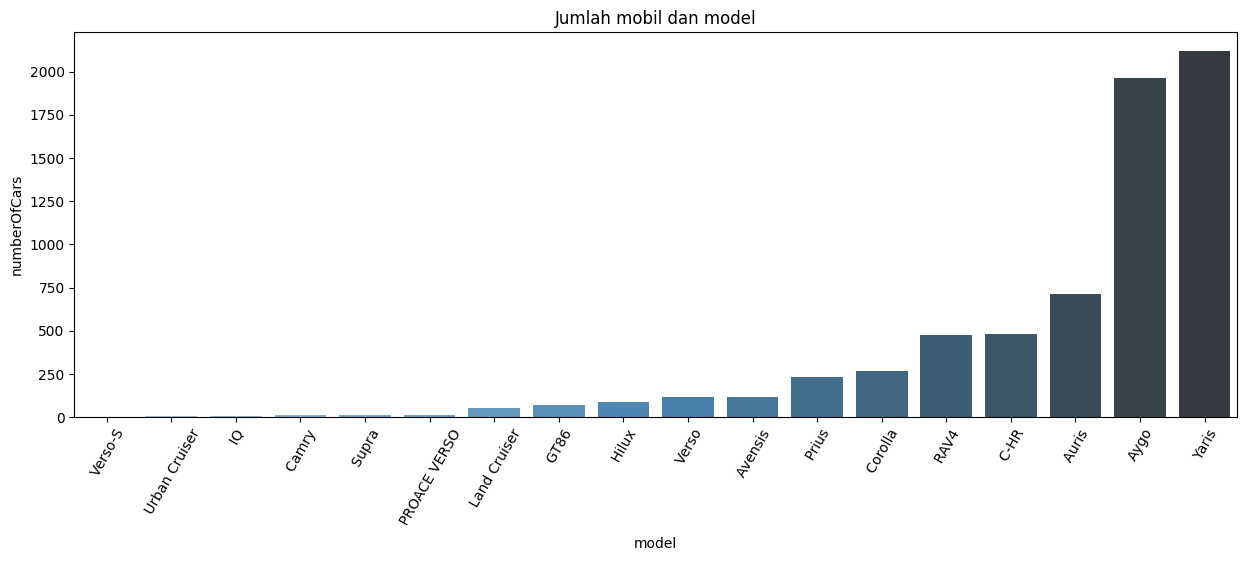

In [14]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], palette='Blues_d').set_title('Jumlah mobil dan model')
plt.xticks(rotation=60)
plt.show()

### Barplot berdasarkan ukuran mesin

In [15]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
engine = engine.rename(columns={'tax':'numberOfCars'})

/var/folders/1_/sz5215394376d82cr86lcyl40000gn/T/ipykernel_3266/1434935057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engine['engineSize'], y=engine['numberOfCars'], palette='Blues_d')


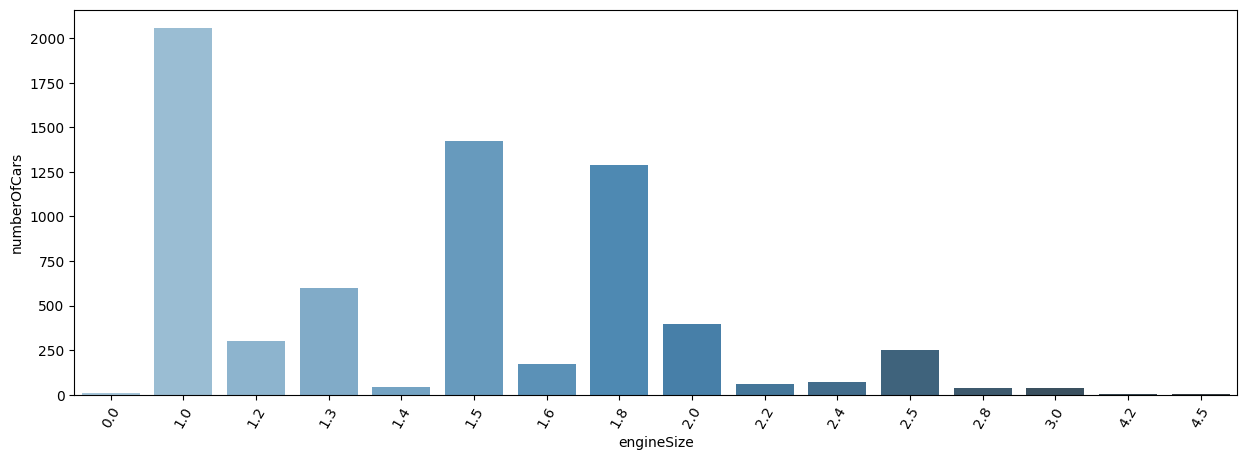

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['numberOfCars'], palette='Blues_d')
plt.xticks(rotation=60)
plt.show()

### Distribusi Mileage

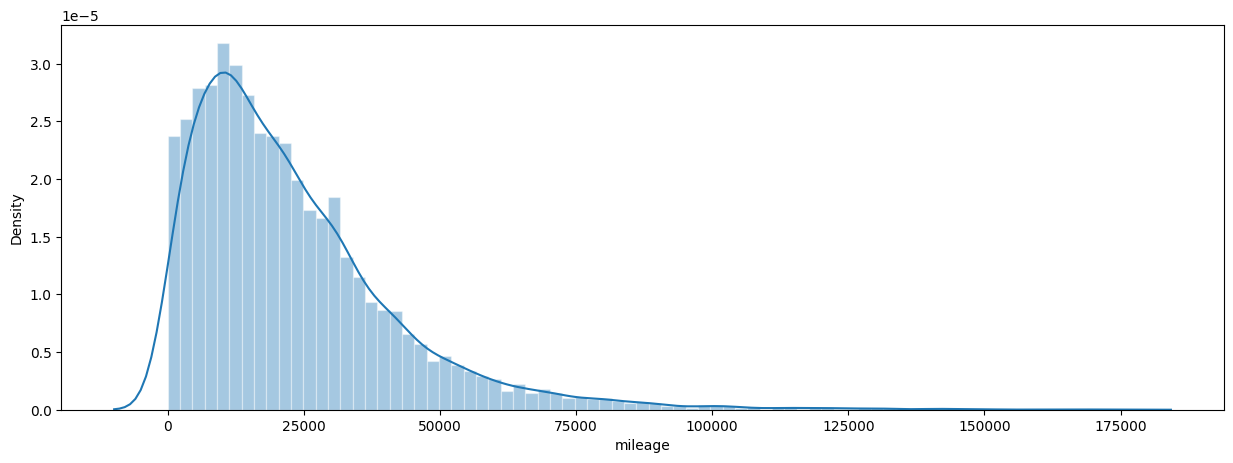

In [17]:
plt.figure(figsize=(15,5))
sns.histplot(df['mileage'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.show()

### Distribusi harga mobil

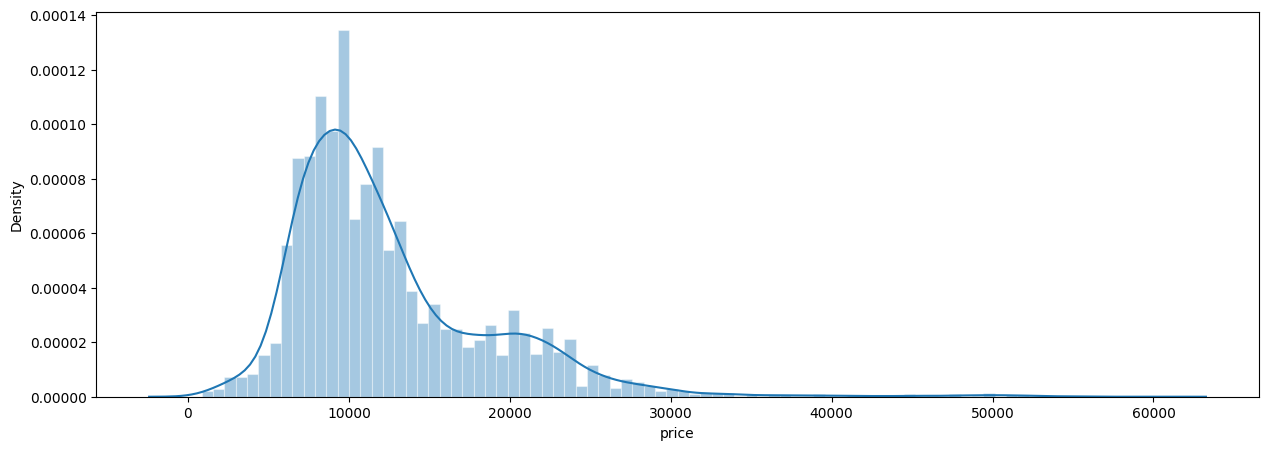

In [18]:
plt.figure(figsize=(15,5))
sns.histplot(df['price'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.show()

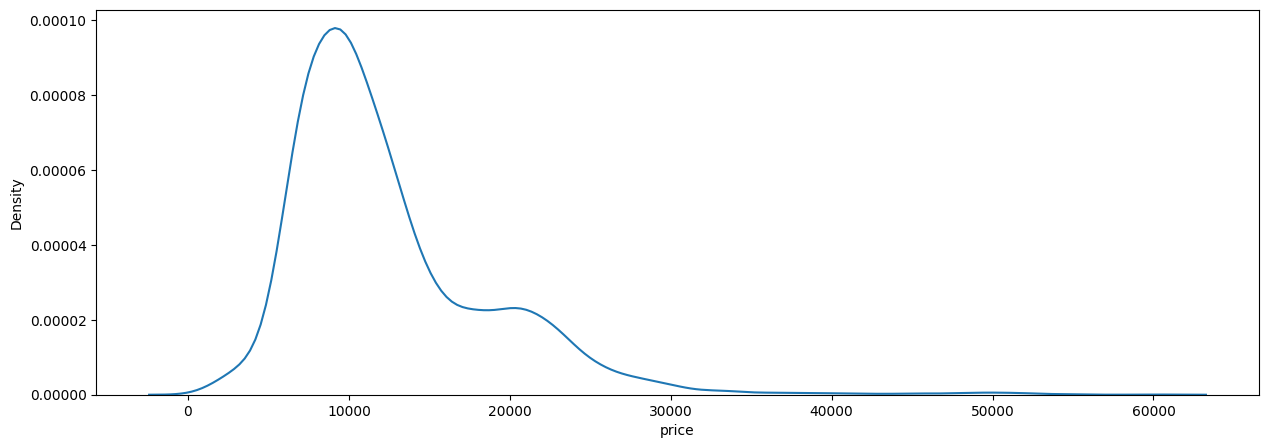

In [19]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['price'])
plt.show()

## Seleksi fitur

In [20]:
# memilih fitur
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = df[features]
# memilih target
y = df['price']
x.shape, y.shape

((6738, 5), (6738,))

## Split data training & data testing

In [21]:
# masukan liblary seleksi model untuk supervised machine learning ke train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=70)
y_test.shape

(1685,)

## Membuat model regresi linier

In [53]:
# memasukan liblary untuk modeling regresi linier
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [54]:
# melihat hasil scoring
score = lr.score(x_test, y_test)
print('Akurasi model regresi linier = ', score)

Akurasi model regresi linier =  0.7678983314475134


## Membuat inputan model regresi linier

In [57]:
# Year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2
input_data = np.array([[2019,5000,145,30.2,2]])
prediction = lr.predict(input_data)
print('Prediksi harga mobil = ', prediction)

Prediksi harga mobil =  [21208.50538579]


/usr/local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Saving model yang akan dimasukan ke pickel

In [58]:
import pickle
filename = 'estimasi-mobil-bekas.sav'
pickle.dump(lr, open(filename, 'wb'))